**1. Aryan Bachhav (210253)**

**2. Atharav Deshmukh (210231)**

**3. Vansh Sachan (211144)**

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud



%matplotlib inline

In [264]:
dateparse = lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

rating_df = pd.read_csv('/kaggle/input/movie/u.data', sep='\t', 
                        names=['user_id', 'movie_id', 'rating', 'timestamp'], 
                        parse_dates=['timestamp'], 
                        date_parser=dateparse)

movie_df = pd.read_csv('/kaggle/input/movie/u.item', sep='|', encoding='latin-1',
                    names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 
                           'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 
                           'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'])

user_df = pd.read_csv('/kaggle/input/movie/u.user', sep='|', encoding='latin-1',
                     names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

/tmp/ipykernel_32/4159775409.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  rating_df = pd.read_csv('/kaggle/input/movie/u.data', sep='\t',


In [265]:
movie_df

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
movie_df.release_date = pd.to_datetime(movie_df.release_date)


In [267]:
movie_df.describe()

,movie_id,release_date,video_release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,1682.000000,1681,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,1989-07-16 12:53:32.373587072,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
min,1.000000,1922-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,1993-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,1995-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,1996-10-18 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1998-10-23 00:00:00,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,485.695893,NaN,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714


In [268]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            1682 non-null   int64         
 1   movie_title         1682 non-null   object        
 2   release_date        1681 non-null   datetime64[ns]
 3   video_release_date  0 non-null      float64       
 4   imdb_url            1679 non-null   object        
 5   unknown             1682 non-null   int64         
 6   action              1682 non-null   int64         
 7   adventure           1682 non-null   int64         
 8   animation           1682 non-null   int64         
 9   childrens           1682 non-null   int64         
 10  comedy              1682 non-null   int64         
 11  crime               1682 non-null   int64         
 12  documentary         1682 non-null   int64         
 13  drama               1682 non-null   int64       

so imdb_url is not useful feature , all values of video_release_data is just Nan values so we can remove both of it .

In [269]:
movie_df.drop(columns=['video_release_date', 'imdb_url'], inplace=True)


We can create genral function to check Nan

In [270]:
def check_nan(df):
    columns_null_count = df.isnull().sum()
    null_percent_df = pd.DataFrame({'null_percent': (columns_null_count/df.shape[0])*100, 'total_null': columns_null_count})
    return null_percent_df[null_percent_df.null_percent>0]

check_nan

(movie_df)

,null_percent,total_null
release_date,0.059453,1


we can remove this using mode or mean values it doesn't affect data on very much because it is just the 1 data who is invalid

In [271]:
movie_df.release_date.fillna(value=movie_df.release_date.mode()[0], inplace=True)


check_nan(movie_df)

,null_percent,total_null


In [272]:
movie_df.isnull().sum()

movie_id        0
movie_title     0
release_date    0
unknown         0
action          0
adventure       0
animation       0
childrens       0
comedy          0
crime           0
documentary     0
drama           0
fantasy         0
film_noir       0
horror          0
musical         0
mystery         0
romance         0
sci_fi          0
thriller        0
war             0
western         0
dtype: int64

**Rating data Info**


In [205]:
rating_df

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


In [206]:
rating_df.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [207]:
rating_df.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,100000
mean,462.48475,425.530130,3.529860,1997-12-31 00:40:51.488619904
min,1.00000,1.000000,1.000000,1997-09-20 03:05:10
25%,254.00000,175.000000,3.000000,1997-11-13 19:18:29.500000
50%,447.00000,322.000000,4.000000,1997-12-22 21:42:24
75%,682.00000,631.000000,4.000000,1998-02-23 18:53:04
max,943.00000,1682.000000,5.000000,1998-04-22 23:10:38
std,266.61442,330.798356,1.125674,NaN


In [208]:
check_nan(rating_df)

,null_percent,total_null


there is no invalid values so all seems right in place.

**USER INFO**

In [209]:
user_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [210]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [211]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [212]:
check_nan(user_df)

,null_percent,total_null


In [213]:
user_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [214]:
pip install ipython-sql==0.4.0


Note: you may need to restart the kernel to use updated packages.


In [215]:
pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [216]:
from uszipcode import SearchEngine


In [217]:
search = SearchEngine()


In [218]:
import pandas as pd

# Assuming user_df is your DataFrame with a 'zip_code' column
# and search is your SearchEngine object

# Define a function to get the major city from a zip code
def get_major_city(zip):
    result = search.by_zipcode(zip)
    if result is not None:
        return result.major_city
    else:
        return None  # Or any other value you prefer for missing data

# Apply the function to create a new 'city' column
user_df['city'] = user_df['zip_code'].apply(get_major_city)


In [219]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
 5   city        908 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.3+ KB


In [220]:
check_nan(user_df)

,null_percent,total_null
city,3.711559,35


In [221]:
null_city_rows = user_df[user_df['city'].isnull()]
print(null_city_rows)

     user_id  age gender     occupation zip_code  city
53        54   22      M      executive    66315  None
72        73   24      M        student    41850  None
73        74   39      M      scientist    T8H1N  None
85        86   26      M  administrator    46005  None
144      145   31      M  entertainment    V3N4P  None
166      167   37      M          other    L9G2B  None
185      186   39      F      executive    00000  None
193      194   38      M  administrator    02154  None
200      201   27      M         writer    E2A4H  None
332      333   47      M          other    V0R2M  None
457      458   47      M     technician    Y1A6B  None
489      490   29      F         artist    V5A2B  None
520      521   19      M        student    02146  None
523      524   56      M       educator    02159  None
577      578   31      M  administrator    M7A1A  None
593      594   46      M       educator    M4J2K  None
598      599   22      F        student    R3T5K  None
599      6

In [222]:
user_df.city.fillna(value=user_df.city.mode()[0], inplace=True)

In [223]:
check_nan(user_df)

,null_percent,total_null


**All seems GOOD**

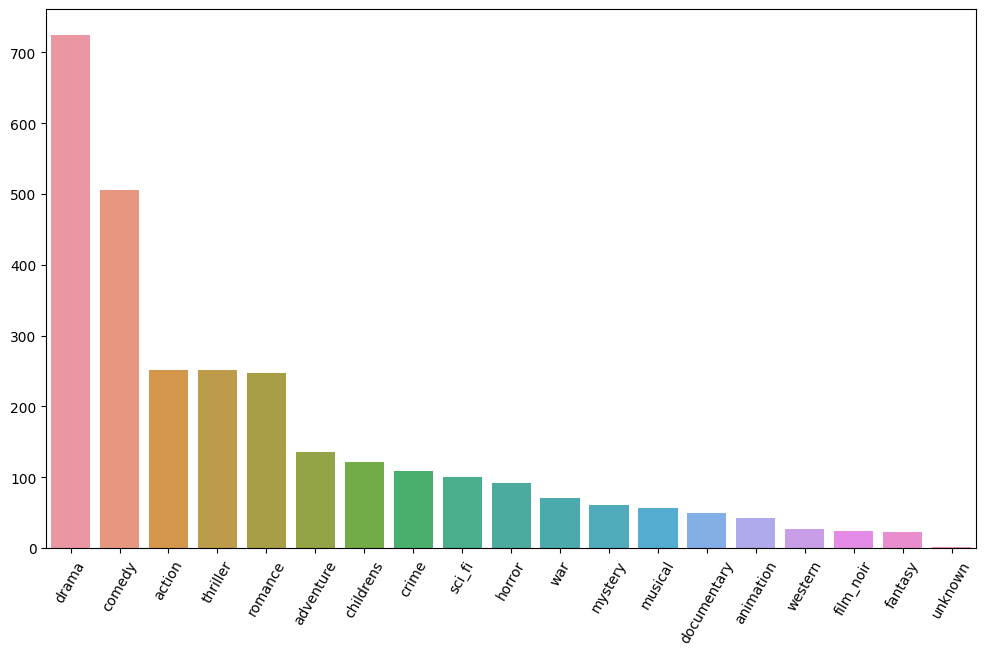

In [68]:
generes = ['unknown', 'action',
       'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery',
       'romance', 'sci_fi', 'thriller', 'war', 'western']

plt.figure(figsize=(12,7))
genere_counts = movie_df.loc[:,generes].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.index, y=genere_counts.values)
plt.xticks(rotation=60);

As we can see Drama is mostly view then comedy


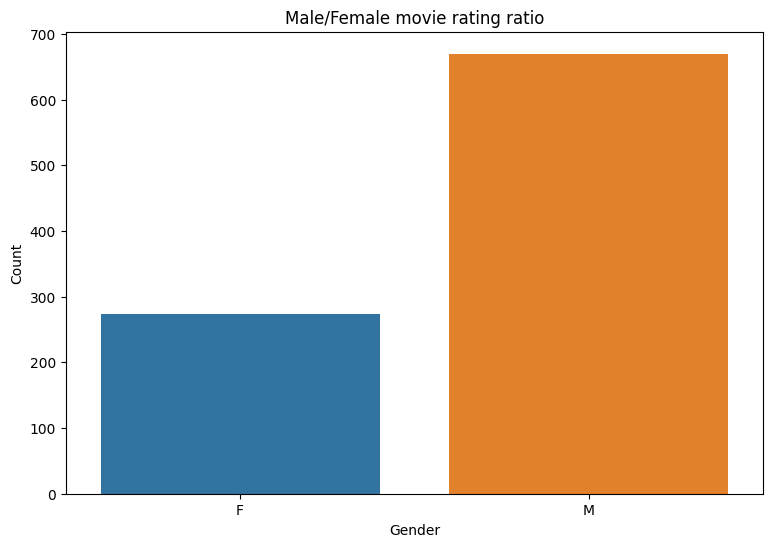

In [70]:
plt.figure(figsize=(9, 6))

# Calculate user gender counts and store them in a DataFrame or Series
gender_counts = user_df.groupby('gender').size().reset_index(name='count')

# Create a bar plot using Seaborn
sns.barplot(x='gender', y='count', data=gender_counts)

plt.title('Male/Female movie rating ratio')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

Male is more into movie watching as compare to female


In [71]:
user_df

,user_id,age,gender,occupation,zip_code,city
0,1,24,M,technician,85711,Tucson
1,2,53,F,other,94043,Mountain View
2,3,23,M,writer,32067,Orange Park
3,4,24,M,technician,43537,Maumee
4,5,33,F,other,15213,Pittsburgh
...,...,...,...,...,...,...
938,939,26,F,student,33319,Fort Lauderdale
939,940,32,M,administrator,02215,Boston
940,941,20,M,student,97229,Portland
941,942,48,F,librarian,78209,San Antonio


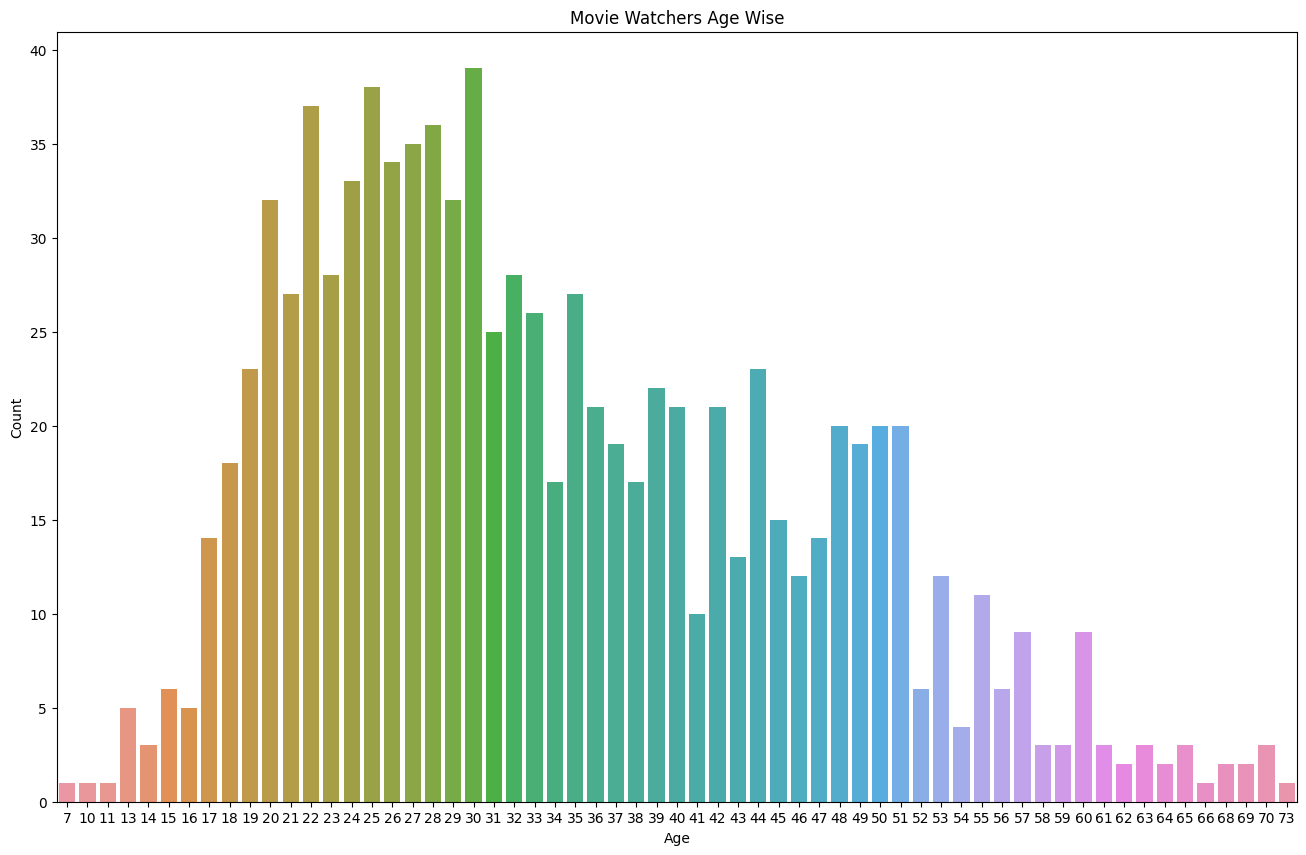

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Assuming user_df is your DataFrame with an 'age' column

plt.figure(figsize=(16, 10))

# Check if 'age' exists in your DataFrame
if 'age' in user_df.columns:
    # Calculate user age group counts and store them in a DataFrame or Series
    age_group_counts = user_df['age'].value_counts().sort_index()

    # Create a bar plot using Seaborn
    sns.barplot(x=age_group_counts.index, y=age_group_counts.values)

    plt.title('Movie Watchers Age Wise')
    plt.xlabel('Age')
    plt.ylabel('Count')



    # Create an x-axis range for the normal distribution curve
    x = np.linspace(user_df['age'].min(), user_df['age'].max(), 100)

    #    plt.legend()
    plt.show()



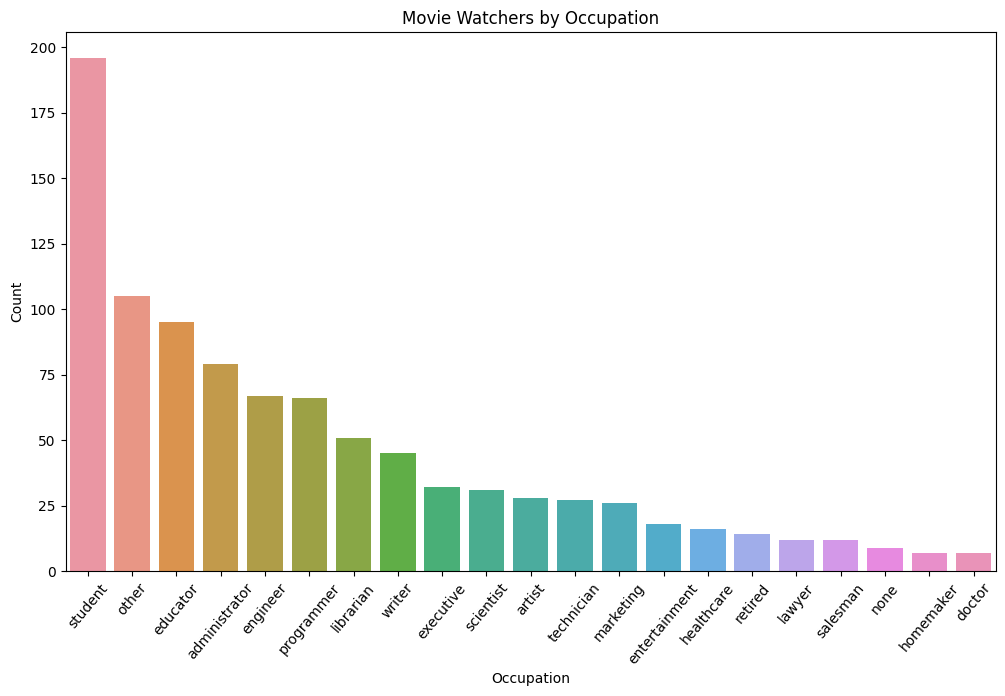

In [74]:

plt.figure(figsize=(12, 7))

# Calculate movie watcher occupants and sort them in descending order
movie_watcher_occupants = user_df.groupby('occupation').size().sort_values(ascending=False)

# Create a bar plot using Seaborn
sns.barplot(x=movie_watcher_occupants.index, y=movie_watcher_occupants.values)

plt.title('Movie Watchers by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

# Rotate the x-axis labels by 50 degrees for better readability
plt.xticks(rotation=50)

plt.show()

In [75]:
pd.DataFrame(user_df.groupby(['occupation', 'age']).size().sort_values(ascending=False))


0
occupation age    
student    20   25
           19   21
           22   21
           18   13
           17   13
...             ..
homemaker  35    1
           32    1
           26    1
           23    1
writer     60    1

[429 rows x 1 columns]

In [76]:
user_df

,user_id,age,gender,occupation,zip_code,city
0,1,24,M,technician,85711,Tucson
1,2,53,F,other,94043,Mountain View
2,3,23,M,writer,32067,Orange Park
3,4,24,M,technician,43537,Maumee
4,5,33,F,other,15213,Pittsburgh
...,...,...,...,...,...,...
938,939,26,F,student,33319,Fort Lauderdale
939,940,32,M,administrator,02215,Boston
940,941,20,M,student,97229,Portland
941,942,48,F,librarian,78209,San Antonio


In [77]:
rating_df

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


In [78]:
rating_df

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


## Prepare Movie Recommendation Data

**Usage:**
1. Create a Reader with rating scale (1, 5).
2. Load user ratings data into a Surprise Dataset from a DataFrame with columns 'user_id', 'movie_id', and 'rating'.

The code snippet prepares data for building a movie recommendation system using Surprise.


In [79]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is needed, but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to the user id, item id, and ratings (in that order).
data = Dataset.load_from_df(rating_df[['user_id', 'movie_id', 'rating']], reader)
     


## Movie Recommendation Algorithm Evaluation

This code evaluates the performance of different recommendation algorithms using 5-fold cross-validation. It computes RMSE and MAE metrics for each algorithm on a movie recommendation dataset.

- Algorithms: SVD++, SVD, KNNBasic, NMF
- Usage: Run cross-validation for each algorithm and collect evaluation results.


In [80]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise.model_selection import cross_validate


algo1 = SVDpp()
algo2=SVD()
algo3 = KNNBasic()
algo4 = NMF()


# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [81]:
algo1_dict

{'test_rmse': array([0.90865597, 0.92485026, 0.91300305, 0.91418914, 0.92837619]),
 'test_mae': array([0.71330796, 0.72599558, 0.71694565, 0.71812426, 0.72755504]),
 'fit_time': (24.583472728729248,
  24.789687871932983,
  24.45783495903015,
  24.71804451942444,
  24.48163104057312),
 'test_time': (4.146037817001343,
  3.9853806495666504,
  3.9502785205841064,
  3.905827522277832,
  4.233297109603882)}

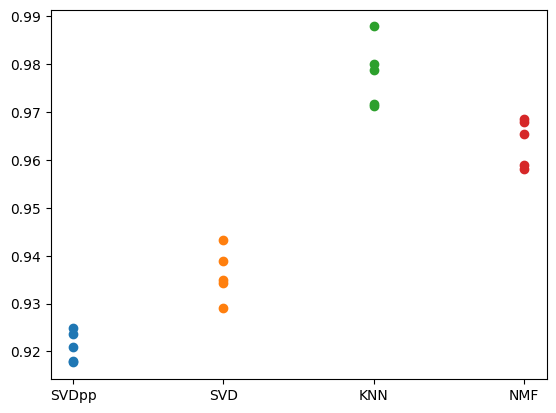

In [92]:

import matplotlib.pyplot as plt
algos = ['SVDpp','SVD', 'KNN', 'NMF']
x_pos = np.arange(float(len(algos)))
Z = [algo1_dict['test_mae'], algo2_dict['test_mae'], algo3_dict['test_mae'],algo4_dict['test_mae']]

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'],algo4_dict['test_rmse']]
for y in range(len(Y)):
    plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')



As we can  see SVDpp giving better result than other algorithms

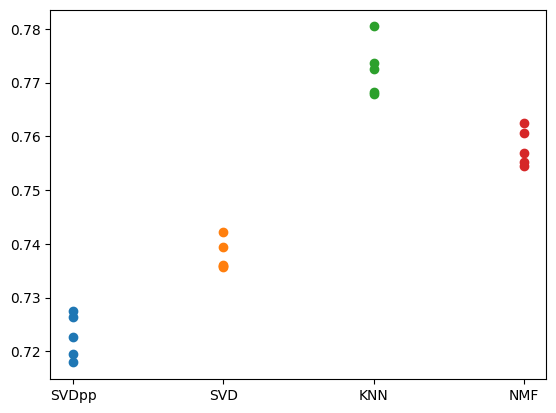

In [93]:

import matplotlib.pyplot as plt
algos = ['SVDpp','SVD', 'KNN', 'NMF']
x_pos = np.arange(float(len(algos)))
Y = [algo1_dict['test_mae'], algo2_dict['test_mae'], algo3_dict['test_mae'],algo4_dict['test_mae']]

for y in range(len(Y)):
    plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')



same patter is here

## Get Top-3 Recommendations

This function takes a list of predictions and returns the top-N recommendations for each user. It organizes the recommendations as a dictionary where keys are user IDs, and values are lists of (item ID, rating estimation) tuples.

**Parameters:**
- `predictions`: List of Prediction objects containing user, item, true rating, estimated rating, and additional info.
- `n`: Number of recommendations to return for each user (default is 3).

**Returns:**
- A dictionary with user IDs as keys and lists of top-N recommendations as values.





In [94]:
from collections import defaultdict

def get_top_n(predictions, n=3):
    

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [103]:
import pandas as pd

# Assuming you have already loaded the movie_df DataFrame

# Create a dictionary to map movie IDs to movie titles
movie_id_to_title = dict(zip(movie_df['movie_id'], movie_df['movie_title']))

# Build the training set
trainset = data.build_full_trainset()

# Fit the collaborative filtering algorithm
algo1.fit(trainset)

# Build the test set with all pairs (u, i) that are NOT in the training set
testset = trainset.build_anti_testset()

# Predict ratings for the test set
predictions = algo1.test(testset)

# Define the number of recommendations per user
num_recommendations_per_user = 3

# Get the top N recommendations for each user
top_n = get_top_n(predictions, n=num_recommendations_per_user)

# Create a list to store the recommendations
recommendations_list = []

# Populate the recommendations_list with user and movie name data
for uid, user_ratings in top_n.items():
    user_recommendations = [movie_id_to_title[iid] for (iid, _) in user_ratings]
    recommendations_list.append([uid] + user_recommendations)

# Create a DataFrame from the recommendations_list
recommendations_df = pd.DataFrame(recommendations_list, columns=["User"] + [f"Recommendation {i+1}" for i in range(num_recommendations_per_user)])

# Print the recommendations DataFrame
print(recommendations_df)


     User                  Recommendation 1  \
0     196             Godfather, The (1972)   
1     186    American President, The (1995)   
2      22  Shawshank Redemption, The (1994)   
3     244                  Boot, Das (1981)   
4     166    Raiders of the Lost Ark (1981)   
..    ...                               ...   
938   939  Hunt for Red October, The (1990)   
939   936                Taxi Driver (1976)   
940   930                      Kolya (1996)   
941   920             Close Shave, A (1995)   
942   941           Schindler's List (1993)   

                         Recommendation 2  \
0        Shawshank Redemption, The (1994)   
1              Sound of Music, The (1965)   
2    Bridge on the River Kwai, The (1957)   
3                     Citizen Kane (1941)   
4              Wrong Trousers, The (1993)   
..                                    ...   
938                        Sabrina (1954)   
939        Godfather: Part II, The (1974)   
940            Wrong Trousers,

In [104]:
recommendations_df

,User,Recommendation 1,Recommendation 2,Recommendation 3
0,196,"Godfather, The (1972)","Shawshank Redemption, The (1994)",Pather Panchali (1955)
1,186,"American President, The (1995)","Sound of Music, The (1965)",Terminator 2: Judgment Day (1991)
2,22,"Shawshank Redemption, The (1994)","Bridge on the River Kwai, The (1957)","Silence of the Lambs, The (1991)"
3,244,"Boot, Das (1981)",Citizen Kane (1941),Casablanca (1942)
4,166,Raiders of the Lost Ark (1981),"Wrong Trousers, The (1993)",Indiana Jones and the Last Crusade (1989)
...,...,...,...,...
938,939,"Hunt for Red October, The (1990)",Sabrina (1954),Toy Story (1995)
939,936,Taxi Driver (1976),"Godfather: Part II, The (1974)",Chinatown (1974)
940,930,Kolya (1996),"Wrong Trousers, The (1993)","Boot, Das (1981)"
941,920,"Close Shave, A (1995)",Schindler's List (1993),"Wrong Trousers, The (1993)"


In [105]:
recommendations_df.describe()

,User
count,943.000000
mean,472.000000
std,272.364951
min,1.000000
25%,236.500000
50%,472.000000
75%,707.500000
max,943.000000


In [106]:
recommendations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User              943 non-null    int64 
 1   Recommendation 1  943 non-null    object
 2   Recommendation 2  943 non-null    object
 3   Recommendation 3  943 non-null    object
dtypes: int64(1), object(3)
memory usage: 29.6+ KB


# **Content Based Recommendation System**

In [224]:
movie_df


,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),1998-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),1994-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
value = movie_df.loc[243, 'movie_title']
value

"Smilla's Sense of Snow (1997)"

In [226]:
rating_df

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


In [227]:
rating_df = pd.merge(rating_df, movie_df[['movie_id', 'movie_title']], on='movie_id')
rating_df

,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,1997-12-04 15:55:49,Kolya (1996)
1,63,242,3,1997-10-01 23:06:30,Kolya (1996)
2,226,242,5,1998-01-04 04:37:51,Kolya (1996)
3,154,242,3,1997-11-10 05:03:55,Kolya (1996)
4,306,242,5,1997-10-10 17:16:33,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,1998-03-29 22:48:02,Mamma Roma (1962)
99996,655,1640,3,1998-02-26 06:30:46,"Eighth Day, The (1996)"
99997,655,1637,3,1998-03-04 04:04:15,Girls Town (1996)
99998,655,1630,3,1998-02-14 03:58:55,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [228]:
rating_df

,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,1997-12-04 15:55:49,Kolya (1996)
1,63,242,3,1997-10-01 23:06:30,Kolya (1996)
2,226,242,5,1998-01-04 04:37:51,Kolya (1996)
3,154,242,3,1997-11-10 05:03:55,Kolya (1996)
4,306,242,5,1997-10-10 17:16:33,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,1998-03-29 22:48:02,Mamma Roma (1962)
99996,655,1640,3,1998-02-26 06:30:46,"Eighth Day, The (1996)"
99997,655,1637,3,1998-03-04 04:04:15,Girls Town (1996)
99998,655,1630,3,1998-02-14 03:58:55,"Silence of the Palace, The (Saimt el Qusur) (1..."


* It would be good to have a database which has one row for each film and a mean rating for that film.

We can do this by grouping by title and then getting a mean rating...

In [229]:
rating_df.groupby('movie_title')['rating'].mean()


movie_title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

The above gives us the films in order of title (what we grouped by). We might prefer to have these ordered by descending mean rating in which case...

In [230]:
rating_df.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head()


movie_title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

We should note that some of the highly rated films may have only one review!

i.e .... **ratings != popularity**

Instead of groupby with .mean(), we can use groupby with .count() to look at films with the largest numbers of ratings...




**Instead of groupby with .mean(), we can use groupby with .count() to look at films with the largest numbers of ratings.**

In [231]:
rating_df.groupby('movie_title')['rating'].count().sort_values(ascending=False).head()


movie_title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64





## Data preparation

Separating dataframe giving films alongside their average ratings...

In [232]:
df = pd.DataFrame(rating_df.groupby('movie_title')['rating'].mean())
df.head()

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Let's be clear that our rating is an average and relabel the column heading...



In [233]:
df.rename(columns={'rating': 'average_rating'}, inplace=True)
df.head(3)

,average_rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257


Now let's look at a way of addressing our observation that some reviews have less value due to very few reviewers. We can create a new num of ratings column in our ratings_df.

We do this by adding number of ratings data from our original df, by using groupby on title again, but this time use .count() instead of .mean() ...

In [234]:
df['num_of_ratings'] = pd.DataFrame(rating_df.groupby('movie_title')['rating'].count())
df.head()

,average_rating,num_of_ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Let's use the df we have created to see a distribution of how many ratings a film typically has.

# visualisation

Text(0, 0.5, 'number of films with that many ratings')

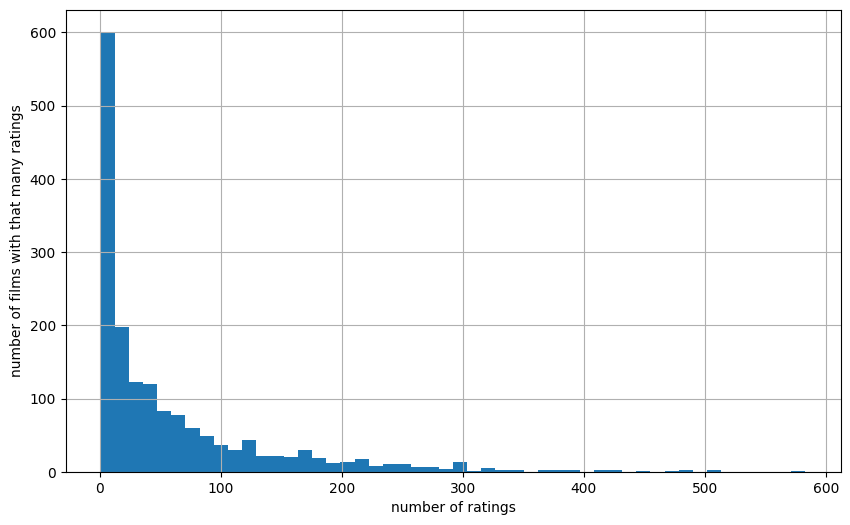

In [235]:
plt.figure(figsize=[10,6]) # Using basic pandas visualisation
df['num_of_ratings'].hist(bins=50)
plt.xlabel('number of ratings')
plt.ylabel('number of films with that many ratings')

So we see a long tailed distribution skewed to high numbers of ratings . Most movies have few ratings.

Now let's look at the distribution of film ratings...

Text(0, 0.5, 'number of films with that rating')

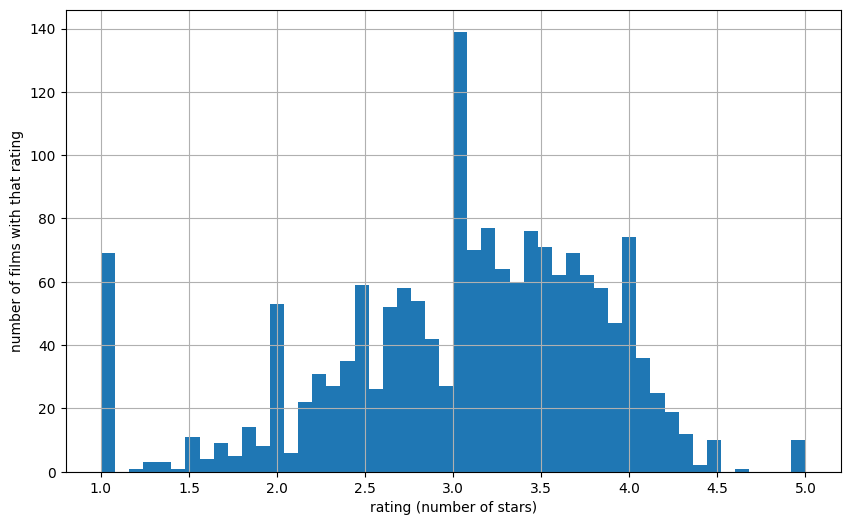

In [236]:
plt.figure(figsize=[10,6])
df.average_rating.hist(bins=50)
plt.xlabel('rating (number of stars)')
plt.ylabel('number of films with that rating')


It's quite intriguing - when we examine the data for film ratings, it appears to exhibit a somewhat normal distribution, but with distinct peaks at integer values.

So, what's causing these high numbers of integer values? Well, these are typically the films that have received just one review, and interestingly, these single-rating films make up the majority of our dataset.

Here's the rationale: When a film has only one rating, that rating remains a whole number because there's no need to calculate an average with other ratings. However, as soon as a film accumulates more than one rating, we start calculating an average, which likely results in non-integer values.

Now, let's see if there is any correlation exist between them.

i) The average rating that a film has.
ii) The number of ratings received by a film.

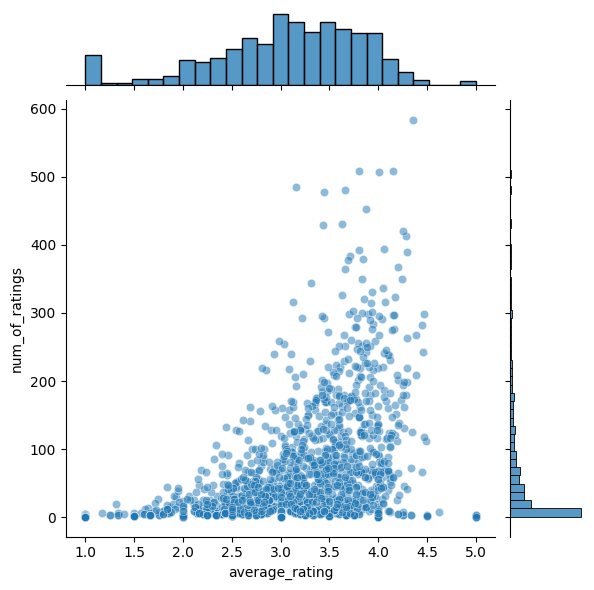

In [237]:
sns.jointplot(x='average_rating',y='num_of_ratings', data=df, alpha=0.5)


This relationship makes sense because films with higher ratings naturally attract more viewers, and people tend to avoid films with poor ratings. It's a reflection of how public perception and popularity can influence a film's overall rating.

# Recommendation system

We want to build a recomendation system based on item similarity (content-based recommender).

Let's create a matrix of ratings indexed by user ids in rows and film titles in columns (a bit like like an X matrix of examples and features).

In [238]:
len(rating_df.groupby(by='movie_title')['rating'].count())


1664

We can convert rating_df into the equivalent of an X matrix using .pivot_table()...

In [239]:
user_movie_matrix = rating_df.pivot_table(values='rating' , index='user_id' , columns='movie_title' )
user_movie_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


Lots of missing values - because most people have not seen most of the movies. We have thus created a sparse matrix.

Let's use our ratings_df dataframe and look at the films with the highest numbers of ratings...

In [240]:
df.sort_values(by='num_of_ratings', ascending=False).head()


,average_rating,num_of_ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Let's focus on ratings from all individual users, for a couple of the popular movies listed above. We'll get individual ratings for user from our other df - moviematrix.

We'll look at Star Wars and Fargo and grab the ratings for all users...



In [241]:
starwars_user_ratings = user_movie_matrix['Star Wars (1977)']
fargo_user_ratings = user_movie_matrix['Fargo (1996)']

In [242]:
starwars_user_ratings.head(15)

user_id
1     5.0
2     5.0
3     NaN
4     5.0
5     4.0
6     4.0
7     5.0
8     5.0
9     5.0
10    5.0
11    NaN
12    4.0
13    5.0
14    5.0
15    5.0
Name: Star Wars (1977), dtype: float64

In [243]:
fargo_user_ratings.head()


user_id
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
Name: Fargo (1996), dtype: float64

So we can basically create a profile for each movie based on how the entirety of users rated it.

What's more interesting is that we can look at the correlation between 2 such series.

pandas has 2 corr methods:

* corr() pairwise correlation between columns in **one df**

* corrwith() pairwise correlation between rows or columns of **two DataFrame objects**


We can use .corrwith() to get correlation between 2 DataFrame objects (note that both Series and DataFrames are DataFrame objects but it is a dataframe object). Here are the types of the objects we are dealing with...

In [244]:
type(user_movie_matrix), type(user_movie_matrix['Star Wars (1977)' ]), type(starwars_user_ratings)


(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

Let's now look at the correlation between our pandas Series of Star Wars ratings for all users vs equivalent series of user ratings (i.e. the columns) for each and every film in the user_movie_matrix DataFrame...



In [245]:
similar_to_starwars = user_movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars.head()


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


movie_title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

The above line of code generates a series which shows how each of the other movies correlate to Star Wars.

The correlation value between 'Star Wars' and 'Til There Was You (1997)' is 0.872872. This value is generated by comparing all of the 943 users' scores for Star Wars with all of the 943 users' scores for 'Til There Was You (1997)'.

We can do the same thing between 'Star Wars' and every other film in the dataset. Each comparison between 2 films results in 1 corr coeff. So there should be a correlation coefficient with each film. There are 1664 films so there should be 1664 correlation coefficients (including self correlation). Let's check...

In [246]:
similar_to_starwars.shape


(1664,)

As stated above, the corr data is produced by comparing our series (Star Wars all 943 user ratings) with each column from the moviematrix. 

In [247]:
similar_to_fargo = user_movie_matrix.corrwith(fargo_user_ratings)



Let's do some tidying up here. We'll create a dataframe to use (rather than a series as used above)...




In [248]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.head(10)

,Correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [249]:
corr_starwars.isnull().sum()

Correlation    254
dtype: int64

From .isnull().sum() we can see we have lots of null values (obvious example case being a film which has got a rating by only 1 user and that user has not reviewed Star Wars.)

Let's drop the null values...

In [250]:
corr_starwars.dropna(inplace=True)
corr_starwars.head(10)

,Correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


We can put our similar films in descending order of correlation, so we can see better 'matches'...

In [251]:
corr_starwars.sort_values(by='Correlation', ascending=False).head(10)


,Correlation
movie_title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


So this looks like it contains some useful but it may also contain results based on films that have very few reviews. eg One user  has watched Star Wars and given it 5 stars then also watched a film that no-one else has seen and also given it 5 stars.

It might make sense to exclude films with less than a certain number of ratings. Let's review the histogram of number of ratings...

Text(0, 0.5, 'number of films with that many ratings')

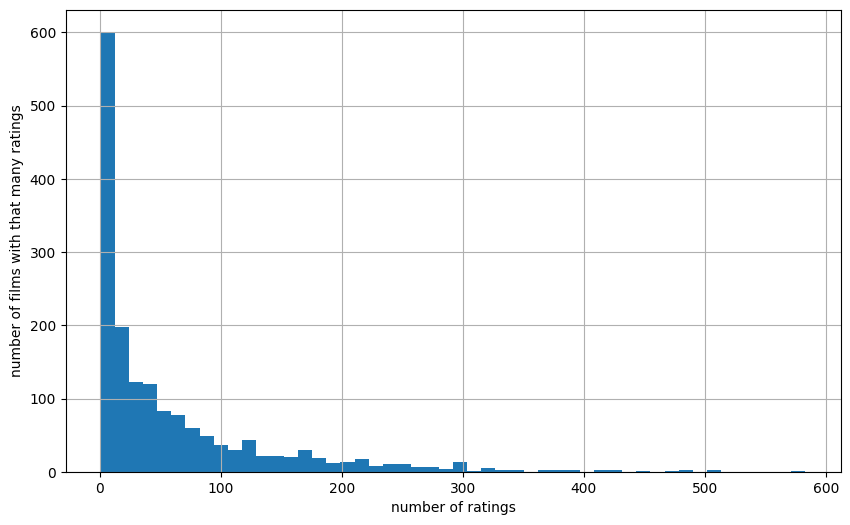

In [252]:
plt.figure(figsize=[10,6]) # Using basic pandas visualisation
df['num_of_ratings'].hist(bins=50)
plt.xlabel('number of ratings')
plt.ylabel('number of films with that many ratings')

From looking at the above plot, we might want to focus on films with more than 50 reviews. First let's add a column to our Star Wars correlation df to show number of ratings...

In [253]:
corr_starwars = corr_starwars.join(df['num_of_ratings'])
corr_starwars.head()


,Correlation,num_of_ratings
movie_title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now let's filter out films with 50 reviews or less...

In [254]:
new_corr_starwars = corr_starwars[corr_starwars['num_of_ratings'] > 50]
new_corr_starwars.head(10)


,Correlation,num_of_ratings
movie_title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
Ace Ventura: Pet Detective (1994),0.062689,103


Let's put this into descending order, so we can get a better appreciation of how well our recommender is working...

In [256]:
new_corr_starwars.sort_values('Correlation',ascending=False).head(20)


,Correlation,num_of_ratings
movie_title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
"Life Less Ordinary, A (1997)",0.411638,53
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331


Perhaps we might want to increase our number of ratings filter since Shadowlands (78 ratings) and Giant (51 ratings) seem unexpectedly high....

In [113]:
new_corr_starwars = corr_starwars[corr_starwars['num_of_ratings'] > 100]
new_corr_starwars.sort_values('Correlation',ascending=False).head(20)

,Correlation,num_of_ratings
movie_title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


It looks like our recommender is mostly suggesting blockbusters, which is perhaps not surprising. Perhaps a better test would be a film that was less of a blockbuster and appealed to more specific tastes.

Given that we want to be able to use our recommender with other films, let's bundle statements used above into a function...

In [257]:
def recommender(film_x, min_num_reviews):
    
    # Get user ratings for film
    film_x_user_ratings = user_movie_matrix[film_x]
    # Create pandas series of correlations for all films with film_x
    similar_to_film_x = user_movie_matrix.corrwith(film_x_user_ratings)
    # Convert to df
    corr_film_x = pd.DataFrame(similar_to_film_x, columns=['Correlation'])
    # Drop nulls
    corr_film_x.dropna(inplace=True)
    # Join ratings info to enable filtering of films with low nums of ratings
    corr_film_x = corr_film_x.join(df['num_of_ratings'])
    # Apply filter
    new_corr_film_x = corr_film_x[corr_film_x['num_of_ratings'] >= min_num_reviews]
    # Remove the input movie itself from the recommendations
    new_corr_film_x = new_corr_film_x[new_corr_film_x.index != film_x]
    # Sort into ascending order
    return new_corr_film_x.sort_values('Correlation', ascending=False).head(20)


In [258]:
recommender('Star Wars (1977)', 50)

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
movie_title,,
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
"Life Less Ordinary, A (1997)",0.411638,53
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101


In [259]:
recommender('Star Wars (1977)', 200)


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
movie_title,,
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
L.A. Confidential (1997),0.319065,297
E.T. the Extra-Terrestrial (1982),0.303619,300
Batman (1989),0.289344,201
Field of Dreams (1989),0.285286,212


In [260]:
recommender('12 Angry Men (1957)', 200)

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
movie_title,,
Rear Window (1954),0.570513,209
Evita (1996),0.355487,259
"Birdcage, The (1996)",0.351056,293
"Sting, The (1973)",0.344150,241
"English Patient, The (1996)",0.336269,481
Toy Story (1995),0.334943,452
"Boot, Das (1981)",0.322201,201
Butch Cassidy and the Sundance Kid (1969),0.317066,216
Psycho (1960),0.314124,239


We see the recommender picking up on 'classic dramas'.

In [261]:
recommender('Clerks (1994)', 200)


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
movie_title,,
"Sting, The (1973)",0.399328,241
"People vs. Larry Flynt, The (1996)",0.388320,215
"Usual Suspects, The (1995)",0.356556,267
"Time to Kill, A (1996)",0.345830,232
Butch Cassidy and the Sundance Kid (1969),0.342085,216
Brazil (1985),0.340136,208
Heat (1995),0.335561,223
"Game, The (1997)",0.335032,251
Apocalypse Now (1979),0.323420,221


For more of a niche film like Clerks, we need to adjust our minimum num of ratings threshold as similar films may also only have not so many reviews. Let's drop threshold to 50...



In [262]:
recommender('Clerks (1994)', 50)

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
movie_title,,
Forbidden Planet (1956),0.670241,67
Excess Baggage (1997),0.645497,52
I Know What You Did Last Summer (1997),0.643809,100
Heavy Metal (1981),0.631165,73
Things to Do in Denver when You're Dead (1995),0.576836,71
"Magnificent Seven, The (1954)",0.572713,121
"American Werewolf in London, An (1981)",0.571524,99
"Brothers McMullen, The (1995)",0.571100,73
"Big Sleep, The (1946)",0.550318,73


Result  improved